In [1]:
%matplotlib inline
import numpy as np
import scipy.ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import pandas as pd
import sh
import dask
import os.path
from __future__ import division
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
matplotlib.rcParams['font.size'] = 16

from progress_bar import *
from useful import *
from mod_nc import *

global data_dir
data_dir = '/scratch/ap587/gfdl_data/'


/scratch/ap587/envs/ipyserv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
exp = 'topdown_hc10_yl{}-obl{}'.format(20,60)
ds = open_runset('/scratch/ap587/gfdl_data/', exp, ncfile='atmos_daily.nc')

ds.time.values[0:30]%360

array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5])

/scratch/ap587/envs/ipyserv/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


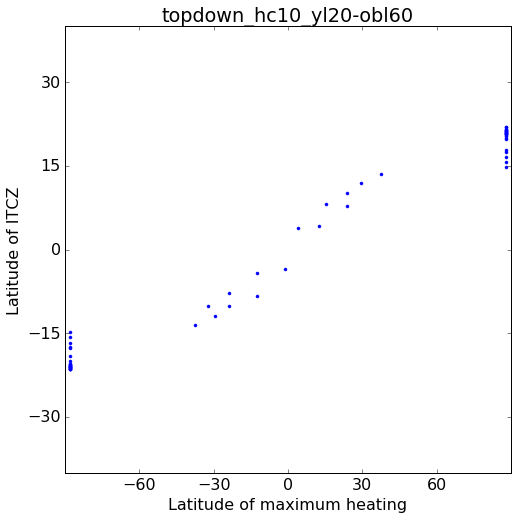

In [13]:
# from paper1_plots
hc = 10
obl = 60
yls = [20]
    
fig, axes = plt.subplots(1,1, figsize=(8,8))

for i, yl in enumerate(yls):
    exp = 'topdown_hc10_yl{}-obl{}'.format(yls[i],obl)
    ds = open_climatology('/scratch/ap587/gfdl_data/', exp)
    itcz_lat = np.zeros(len(ds.pentad))
    peak_t_lat = np.zeros(len(ds.pentad))
    for k in range(len(ds.pentad)):
        itcz_lat[k] = calc_itcz_lat(ds.isel(pentad=k))
        peak_t_lat[k] = ds.lat.values[np.argmax(ds.temp.isel(pentad=k, pfull=-1))]
    
    ax = axes #axes[i//2, i%2]
    ax.plot(peak_t_lat, itcz_lat, '.')
    ax.set_xlim([-90,90])
    ax.set_ylim([-40,40])
    ax.set_xticks(np.arange(-60,61,30))
    ax.set_yticks(np.arange(-30,31,15))
    ax.set_title(exp)
    ax.set_xlabel('Latitude of maximum heating')
    ax.set_ylabel('Latitude of ITCZ')

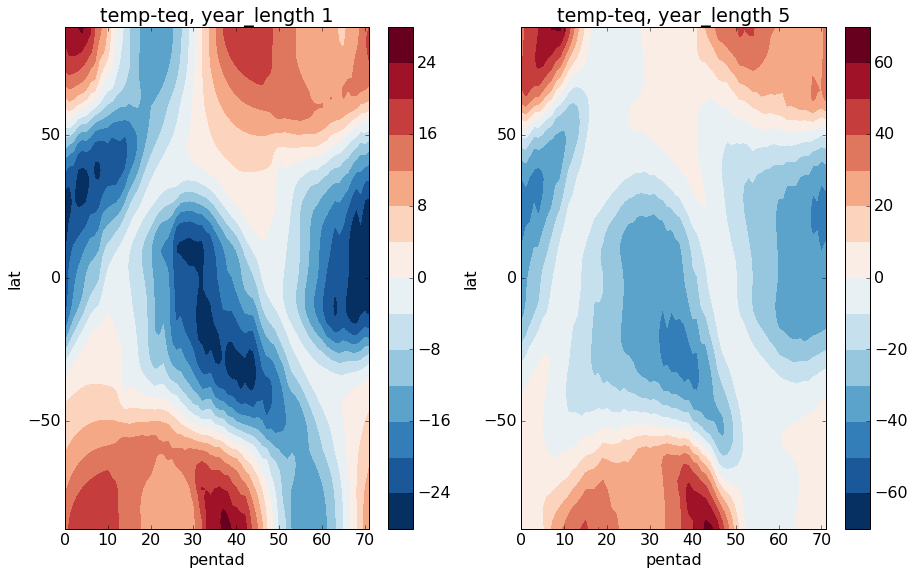

In [46]:
fig, axes = plt.subplots(1,2, figsize=(15,9))
ds = open_climatology(data_dir, 'topdown_hc10_yl1-obl30')
(ds.temp-ds.teq).isel(pfull=-1).plot.contourf(x='pentad', y='lat', levels=15, ax=axes[0])

ds = open_climatology(data_dir, 'topdown_hc10_yl5-obl30')
ds.coords['pentad'] = (ds.pentad + 22)%72
ds = ds.sortby('pentad')
(ds.temp-ds.teq).isel(pfull=-1).plot.contourf(x='pentad', y='lat', levels=15, ax=axes[1])

axes[0].set_title('temp-teq, year_length 1')

axes[1].set_title('temp-teq, year_length 5')

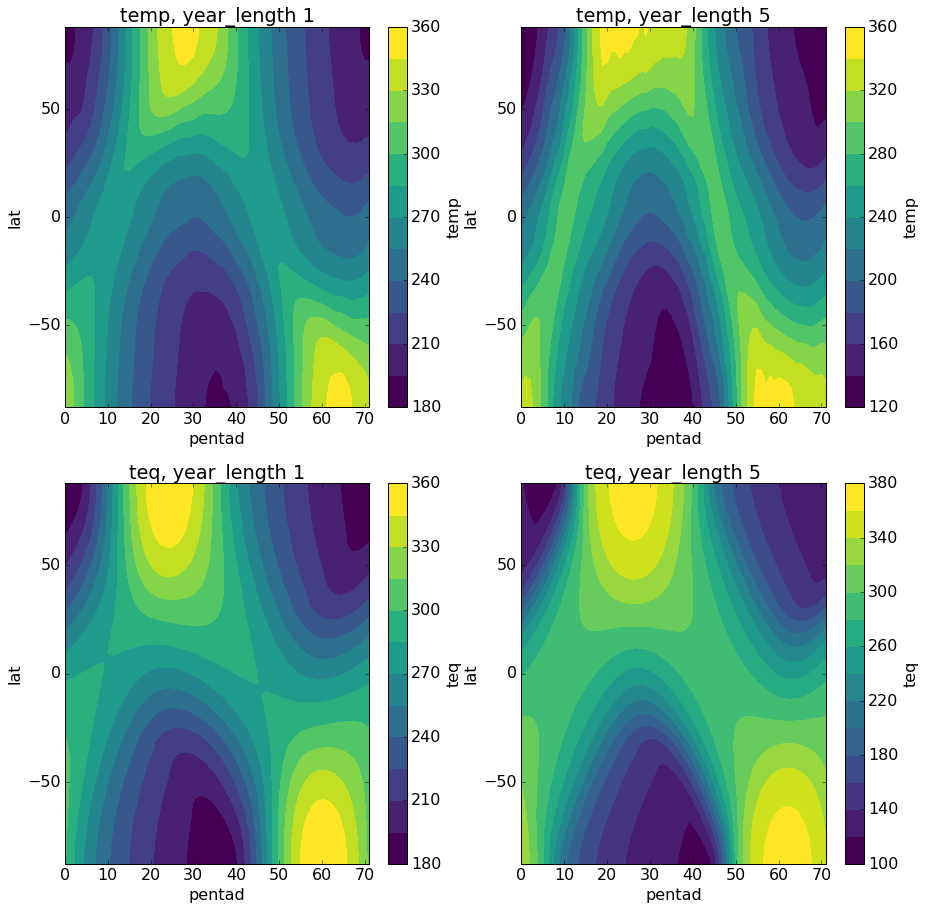

In [74]:
fig, axes = plt.subplots(2,2, figsize=(15,15))
ds = open_climatology(data_dir, 'topdown_hc10_yl1-obl60')
ds.temp.isel(pfull=-1).plot.contourf(x='pentad', y='lat', levels=15, ax=axes[0,0])
ds.teq.isel(pfull=-1).plot.contourf(x='pentad', y='lat', levels=15, ax=axes[1,0])

ds = open_climatology('/scratch/ap587/gfdl_data/', 'topdown_hc10_yl5-obl60')
ds.coords['pentad'] = (ds.pentad + 22)%72
ds = ds.sortby('pentad')
ds.temp.isel(pfull=-1).plot.contourf(x='pentad', y='lat', levels=15, ax=axes[0,1])
ds.teq.isel(pfull=-1).plot.contourf(x='pentad', y='lat', levels=15, ax=axes[1,1])

axes[0,0].set_title('temp, year_length 1')
axes[1,0].set_title('teq, year_length 1')

axes[0,1].set_title('temp, year_length 5')
axes[1,1].set_title('teq, year_length 5')


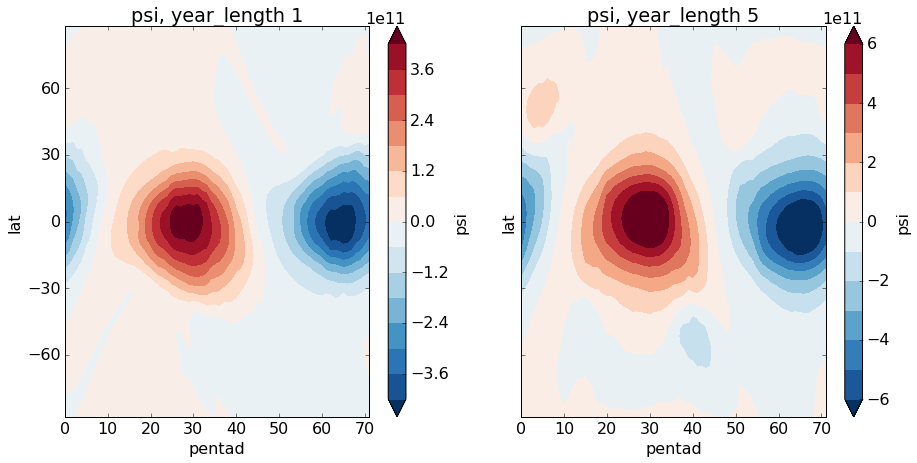

In [75]:
fig, axes = plt.subplots(1,2, figsize=(15,7), sharey=True)
ds = open_climatology(data_dir, 'topdown_hc10_yl1-obl60')
ds.psi.sel(pfull=500, method='nearest').plot.contourf(x='pentad', y='lat', levels=15, ax=axes[0], robust=True)

ds = open_climatology('/scratch/ap587/gfdl_data/', 'topdown_hc10_yl5-obl60')
ds.coords['pentad'] = (ds.pentad + 22)%72
ds = ds.sortby('pentad')
ds.psi.isel(pfull=15).plot.contourf(x='pentad', y='lat', levels=15, ax=axes[1], robust=True)

axes[0].set_title('psi, year_length 1')
axes[1].set_title('psi, year_length 5')
axes[0].set_yticks(np.arange(-60,61,30))

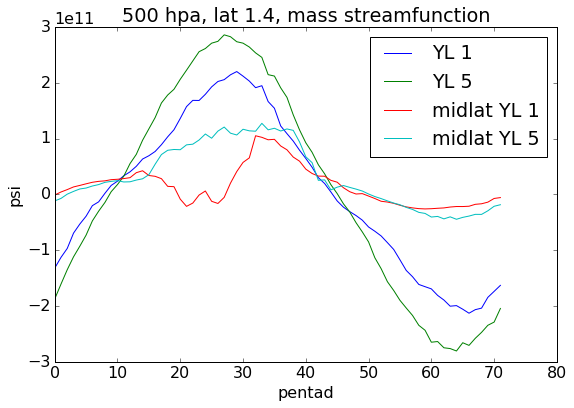

In [65]:
fig, axes = plt.subplots(1,1, figsize=(9,6))
ds = open_climatology(data_dir, 'topdown_hc10_yl1-obl30')
ds.psi.sel(pfull=500, method='nearest').isel(lat=31).plot(label='YL 1')

ds = open_climatology('/scratch/ap587/gfdl_data/', 'topdown_hc10_yl5-obl30')
ds.coords['pentad'] = (ds.pentad + 22)%72
ds = ds.sortby('pentad')
ds.psi.isel(pfull=15).isel(lat=31).plot(label='YL 5')

ds = open_climatology(data_dir, 'topdown_hc10_yl1-obl30')
ds.psi.sel(pffig, axes = plt.subplots(1,2, figsize=(15,7), sharey=True)
ds = open_climatology(data_dir, 'topdown_hc10_yl1-obl30')
ds.psi.sel(pfull=500, method='nearest').plot.contourf(x='pentad', y='lat', levels=15, ax=axes[0], robust=True)

ds = open_climatology('/scratch/ap587/gfdl_data/', 'topdown_hc10_yl5-obl30')
ds.coords['pentad'] = (ds.pentad + 22)%72
ds = ds.sortby('pentad')
ds.psi.isel(pfull=15).plot.contourf(x='pentad', y='lat', levels=15, ax=axes[1], robust=True)

axes[0].set_title('psi, year_length 1')
axes[1].set_title('psi, year_length 5')
axes[0].set_yticks(np.arange(-60,61,30))ull=500, method='nearest').isel(lat=21).plot(label='midlat YL 1')

ds = open_climatology('/scratch/ap587/gfdl_data/', 'topdown_hc10_yl5-obl30')
ds.coords['pentad'] = (ds.pentad + 22)%72
ds = ds.sortby('pentad')
ds.psi.isel(pfull=15).isel(lat=21).plot(label='midlat YL 5')

axes.set_title('500 hpa, lat 1.4, mass streamfunction')
axes.legend()

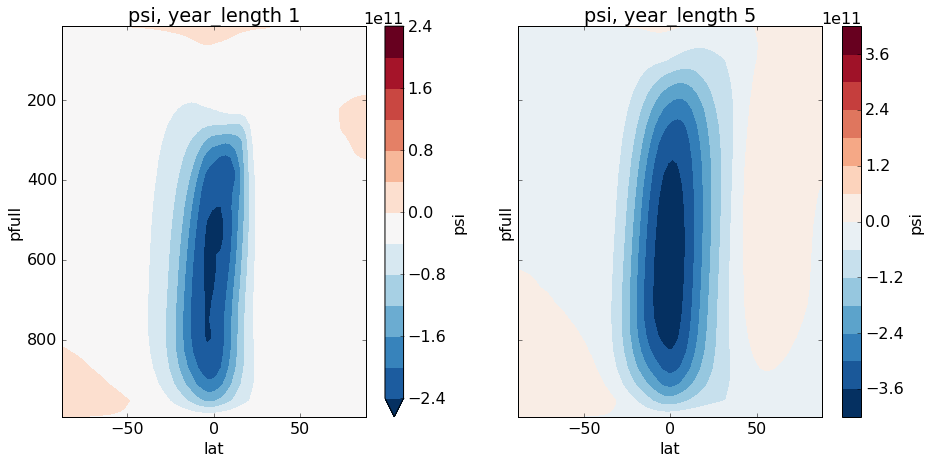

In [76]:
fig, axes = plt.subplots(1,2, figsize=(15,7), sharey=True)
ds = open_climatology(data_dir, 'topdown_hc10_yl1-obl60')
ds.psi.isel(pentad=55).plot.contourf(x='lat', y='pfull', levels=15, ax=axes[0], robust=True)

ds = open_climatology('/scratch/ap587/gfdl_data/', 'topdown_hc10_yl5-obl60')
ds.coords['pentad'] = (ds.pentad + 22)%72
ds = ds.sortby('pentad')
ds.psi.isel(pentad=55).plot.contourf(x='lat', y='pfull', levels=15, ax=axes[1], robust=True)

axes[0].set_title('psi, year_length 1')
axes[1].set_title('psi, year_length 5')
axes[0].invert_yaxis()

In [67]:
ds

<xarray.Dataset>
Dimensions:      (lat: 64, latb: 65, lonb: 129, nv: 2, pentad: 72, pfull: 25, phalf: 26)
Coordinates:
  * lonb         (lonb) float64 -1.406 1.406 4.219 7.031 9.844 12.66 15.47 ...
  * lat          (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 ...
  * latb         (latb) float64 -90.0 -86.58 -83.76 -80.96 -78.16 -75.36 ...
  * nv           (nv) float64 1.0 2.0
  * phalf        (phalf) float64 0.0 40.53 81.06 121.6 162.1 202.7 243.2 ...
  * pfull        (pfull) float64 14.91 59.64 100.6 141.4 182.0 222.6 263.2 ...
  * pentad       (pentad) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 ...
    h            (pfull) float64 dask.array<shape=(25,), chunksize=(25,)>
Data variables:
    ps           (pentad, lat) float64 dask.array<shape=(72, 64), chunksize=(72, 64)>
    bk           (pentad, phalf) float64 dask.array<shape=(72, 26), chunksize=(72, 26)>
    pk           (pentad, phalf) float64 dask.array<shape=(72, 26), chunksize=(72, 26)>
    vor          (pentad,